In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

%matplotlib inline

# Augumented bonding curve Mathematics

### Hatch Sale Equations

- Initial Raise $d_0$ Dai
- Initial Reserve is $R_0 = (1-\theta) d_0$
- Hatch sale Price $p_0$ (dai per token) determines the initial supply: $S_0 = d_0/p_0$
- Power Function Invariant shape: $V(R, S) = \frac{S^\kappa}{R}$
- Price function (DAI per Token): $P(R) = \frac{\kappa R^{(\kappa-1)/ \kappa}}{V_0^{1 / \kappa}}$
- Supply function (tokens): $S(R) = \sqrt[\kappa]{V_0 R}$
- Reserve function (xDAI): $R(S) = \frac{S^{\kappa}}{V_0} $
- The invariant coef: $V_0 = V(R_0, S_0) = \frac{S_0^\kappa}{R_0} = \left(\frac{1}{p_0(1-\theta)}\right)^\kappa R_0^{\kappa-1}$
- The post hatch price: $p_1=P(R_0) = \frac{\kappa R_0^{(\kappa-1)/ \kappa}}{V_0^{1 / \kappa}} = \kappa R_0^{(\kappa-1)/ \kappa} \cdot(1-\theta)p_0\cdot R_0^{-(\kappa-1)/\kappa} = \kappa(1-\theta) p_0$
- The Return factor: $\frac{p_1}{p_0} = {\kappa}(1-\theta)$

### Invariant Preserving Deposit-to-Mint
 - Deposit $\Delta R$ xdai 
 - Conservation equation: $V(R+ \Delta R, S+\Delta S) = \frac{(S+\Delta S)^\kappa}{R+\Delta R} =V_0$
 - Derived Mint equation: $\Delta S = mint\big(\Delta R ; (R,S)\big)= \sqrt[\kappa]{V_0(R+\Delta R)}-S$
 - Realized Price is: $\bar{P}(\Delta R) =\frac{\Delta R}{\Delta S} = \frac{\Delta R}{\sqrt[\kappa]{V_0(R+\Delta R)}-\sqrt[\kappa]{V_0(R)}} \rightarrow \big(\frac{\partial S(R)}{\partial R} \big)^{-1}$ as $\Delta R \rightarrow 0$
 - The limiting price is the spot price: $\lim_{\Delta R \rightarrow 0} \bar{P}(\Delta R)=\big(\frac{\partial S(R)}{\partial R}\big)^{-1}= \big(\frac{V_0^{1/\kappa} \cdot  R^{1/\kappa-1}}{\kappa}\big)^{-1}= \frac{\kappa R^{1-1/\kappa}}{V_0^{1/\kappa}} = \frac{\kappa R^{(\kappa-1)/\kappa}}{V_0^{1/\kappa}} =P(R)$
 
### Invariant Preserving Burn-to-Withdraw
 - Burn $\Delta S$ tokens
 - Conservation equation: $V(R- \Delta R, S-\Delta S) = \frac{(S-\Delta S)^\kappa}{R-\Delta R} =V_0$
 - Derived Withdraw equation: $\Delta R = withdraw\big(\Delta S ; (R,S)\big)= R-\frac{(S-\Delta S)^\kappa}{V_0}$
 - Realized Price is: $\bar{P}(\Delta S) =\frac{\Delta R}{\Delta S} = \frac{\frac{S^{\kappa}}{V_0}-\frac{(S-\Delta S)^\kappa}{V_0}}{\Delta S} \rightarrow \frac{\partial R(S)}{\partial S} $ as $\Delta S \rightarrow 0$
 - The limiting price is the spot price: $\lim_{\Delta S \rightarrow 0} \bar{P}(\Delta S)=\frac{\partial R(S)}{\partial S}=\frac{\kappa S^{\kappa-1}}{V_0} = \frac{\kappa \cdot (\sqrt[\kappa]{V_0 R})^{\kappa-1}}{V_0}= \frac{\kappa R^{(\kappa-1)/\kappa}}{V_0^{1/\kappa}}=P(R)$
 - Given friction coef $\phi$ 
     - sent to burning agent address: $\Delta R_{agent} = (1-\phi) \Delta R$
     - sent to the funding pool address: $\Delta R_{pool} = \phi \Delta R$
     - due to the friction the true realized price for the agent is $(1-\phi)\cdot \bar{P}(\Delta S)$
     - due to the friction the true return factor post withdraw is: ${\kappa}(1-\theta)(1-\phi)$

In [2]:
#integer_units = 10**12 #account for decimal places to a token
#scale_units = 10**6 #millions of tokens, million of DAI
#mu = integer_units*scale_units

#value function for a given state (R,S)
def invariant(R,S,kappa):
    return (S**kappa)/R

#given a value function (parameterized by kappa)
#and an invariant coeficient V0
#return Supply S as a function of reserve R
def supply(R, kappa, V0):
    return (V0*R)**(1/kappa)

#given a value function (parameterized by kappa)
#and an invariant coeficient V0
#return a spot price P as a function of reserve R
def spot_price(R, kappa, V0):
    return kappa*R**((kappa-1)/kappa)/V0**(1/kappa)

#for a given state (R,S)
#given a value function (parameterized by kappa)
#and an invariant coeficient V0
#deposit deltaR to Mint deltaS
#with realized price deltaR/deltaS
def mint(deltaR, R,S, kappa, V0):
    deltaS = (V0*(R+deltaR))**(1/kappa)-S
    realized_price = deltaR/deltaS
    return deltaS, realized_price

#for a given state (R,S)
#given a value function (parameterized by kappa)
#and an invariant coeficient V0
#burn deltaS to Withdraw deltaR
#with realized price deltaR/deltaS
def withdraw(deltaS, R,S, kappa, V0):
    deltaR = R-((S-deltaS)**kappa)/V0
    realized_price = deltaR/deltaS
    return deltaR, realized_price

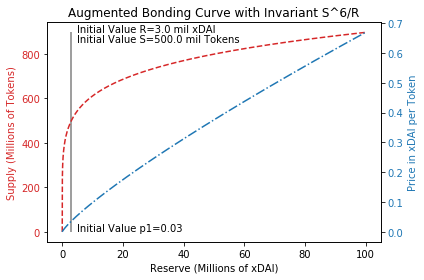

In [3]:
d0 = 5 #million DAI
p0 = .01 #DAI per tokens
theta = .4

R0 =  d0*(1-theta) #million DAI
S0 = d0/p0

kappa = 6
V0 = invariant(R0,S0,kappa)

reserve = np.arange(0,100,.01)
supp = np.array([supply(r,kappa, V0) for r in reserve])
price = np.array([spot_price(r,kappa, V0) for r in reserve])

fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('Reserve (Millions of xDAI)')
ax1.set_ylabel('Supply (Millions of Tokens)', color=color)
ax1.plot(reserve, supp,'--', color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('Price in xDAI per Token', color=color)  # we already handled the x-label with ax1
ax2.plot(reserve, price,'-.', color=color)
ax2.tick_params(axis='y', labelcolor=color)

ax1.vlines(R0,0,supp[-1], alpha=.5)
ax1.text(R0+.02*reserve[-1], supp[-1], "Initial Value R="+str(int(100*R0)/100)+" mil xDAI")
ax1.text(R0+.02*reserve[-1], .95*supp[-1], "Initial Value S="+str(S0)+" mil Tokens")
#ax1.hlines(S0,0,R0)

ax2.text(R0+.02*reserve[-1], price[3], "Initial Value p1="+str(int(100*spot_price(R0,kappa,V0))/100))


plt.title('Augmented Bonding Curve with Invariant S^'+str(kappa)+'/R')
fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

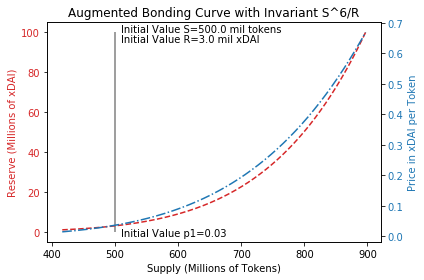

In [4]:
fig, ax1 = plt.subplots()

cp = 100
color = 'tab:red'
ax1.set_xlabel('Supply (Millions of Tokens)')
ax1.set_ylabel('Reserve (Millions of xDAI)', color=color)
ax1.plot(supp[cp:], reserve[cp:],'--', color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('Price in xDAI per Token', color=color)  # we already handled the x-label with ax1
ax2.plot(supp[cp:], price[cp:],'-.', color=color)
ax2.tick_params(axis='y', labelcolor=color)

ax1.vlines(S0,0,reserve[-1], alpha=.5)
ax1.text(S0*1.02, reserve[-1], "Initial Value S="+str(int(100*S0)/100)+" mil tokens")
ax1.text(S0*1.02, .95*reserve[-1], "Initial Value R="+str(R0)+" mil xDAI")
#ax1.hlines(S0,0,R0)

ax2.text(S0*1.02, price[3], "Initial Value p1="+str(int(100*spot_price(R0,kappa,V0))/100))


plt.title('Augmented Bonding Curve with Invariant S^'+str(kappa)+'/R')
fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

In [5]:
#given V0 and kappa
#sweep the reserve
reserve = None
reserve = np.arange(.01,100,.01)
price = np.array([spot_price(r,kappa, V0) for r in reserve])

scaler = 100
#realized price for withdrawing burning 1% of tokens
withdraw_price=[withdraw(supply(r,kappa,V0)/scaler, r,supply(r,kappa,V0), kappa, V0)[1] for r in reserve]

posterior_withdraw_price =[spot_price(r-withdraw(supply(r,kappa,V0)/scaler, r,supply(r,kappa,V0), kappa, V0)[0],kappa,V0) for r in reserve]

#realized price for depositing 1% more Xdai into the reserve
mint_price=[mint(r/scaler, r, supply(r,kappa,V0), kappa, V0)[1] for r in reserve]

posterior_mint_price =[spot_price(r+r/scaler, kappa, V0) for r in reserve]


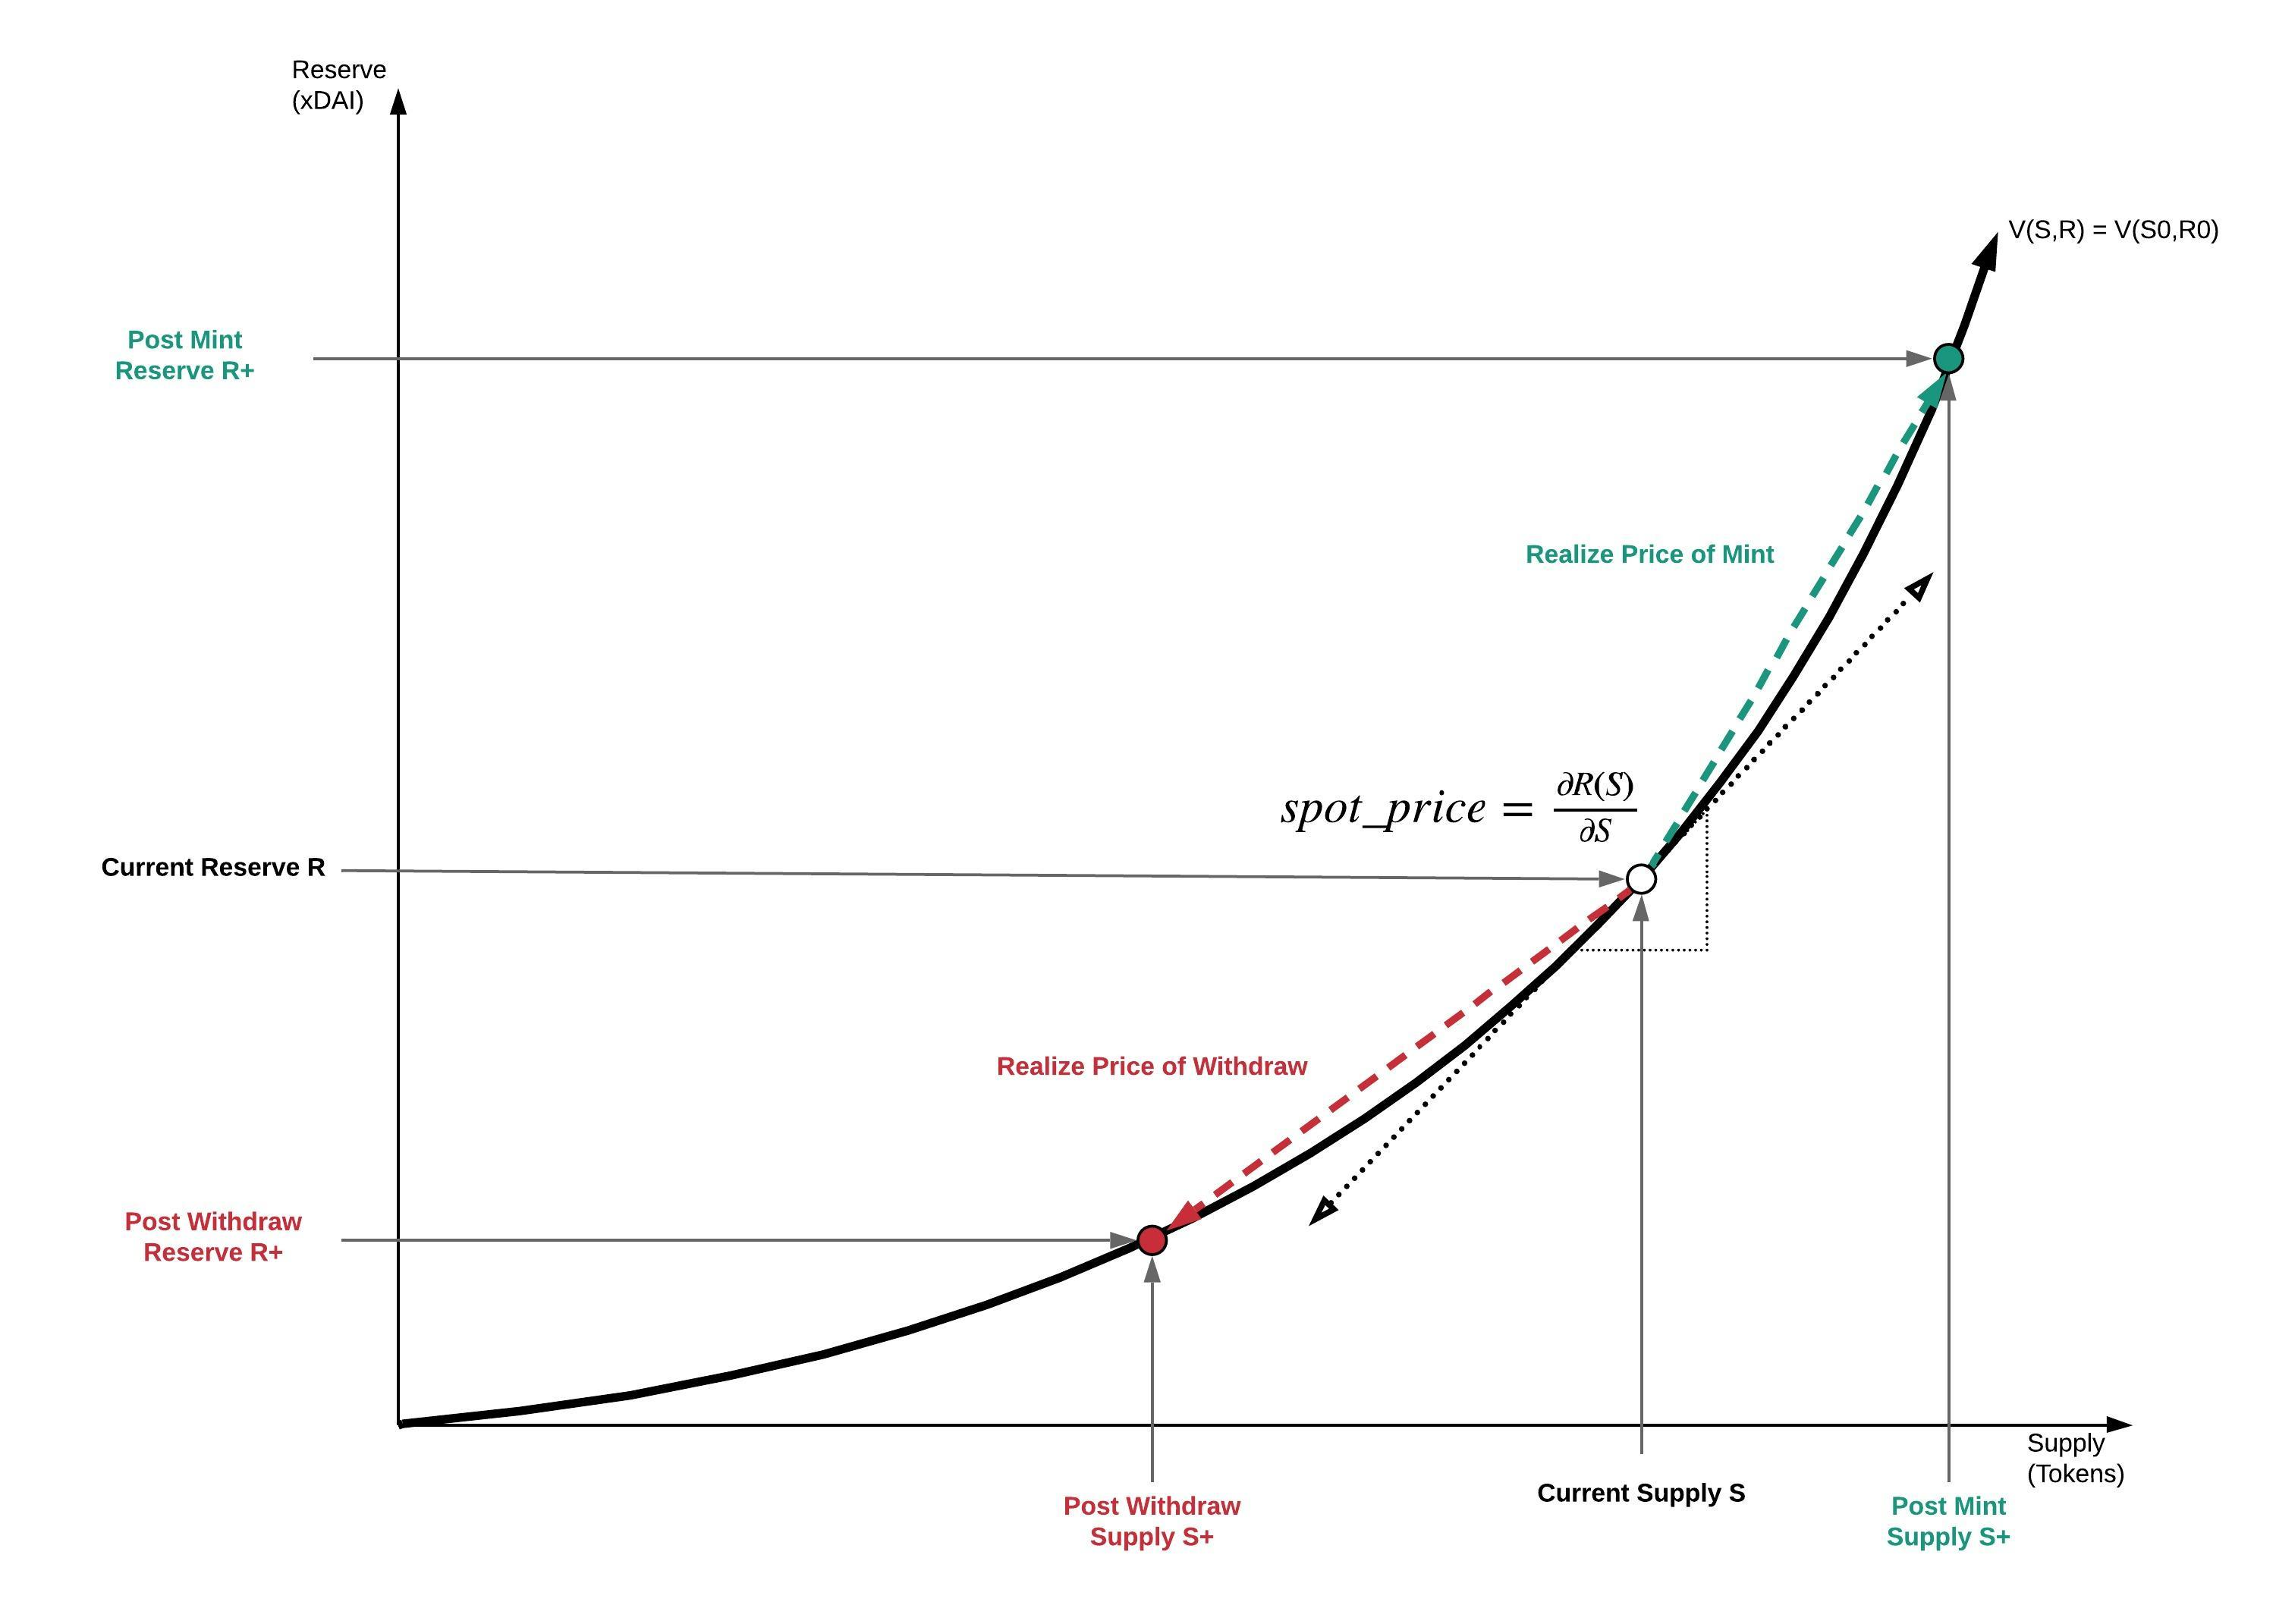

In [7]:
from IPython.display import Image
Image(filename='slippage.jpeg')

In [8]:
pdf = pd.DataFrame({'reserve':reserve, 'spot_price':price, '1% mint_price':mint_price,'1% withdraw_price':withdraw_price, '1% withdraw_posterior_price':posterior_withdraw_price, '1% mint_posterior_price':posterior_mint_price })

In [9]:
pdf.tail(10)

1% mint_posterior_price  1% mint_price  1% withdraw_posterior_price  \
9989                 0.673918       0.671133                     0.635597   
9990                 0.673974       0.671189                     0.635650   
9991                 0.674031       0.671245                     0.635703   
9992                 0.674087       0.671301                     0.635756   
9993                 0.674143       0.671357                     0.635809   
9994                 0.674199       0.671413                     0.635862   
9995                 0.674255       0.671468                     0.635915   
9996                 0.674312       0.671524                     0.635968   
9997                 0.674368       0.671580                     0.636021   
9998                 0.674424       0.671636                     0.636074   

      1% withdraw_price  reserve  spot_price  
9989           0.651865    99.90    0.668353  
9990           0.651920    99.91    0.668409  
9991           0.651974    99.92    0.668465  
9992           0.652029    99.93    0.668520  
9993           0.652083    99.94    0.668576  
9994           0.652137    99.95    0.668632  
9995           0.652192    99.96    0.668688  
9996           0.652246    99.97    0.668743  
9997           0.652300    99.98    0.668799  
9998           0.652355    99.99    0.668855

/anaconda3/lib/python3.6/site-packages/pandas/plotting/_core.py:1716: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  series.name = label


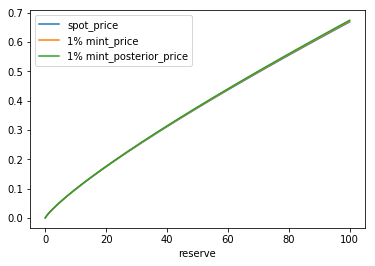

In [10]:
pdf.plot(x="reserve", y = ["spot_price","1% mint_price","1% mint_posterior_price" ]) 

/anaconda3/lib/python3.6/site-packages/pandas/plotting/_core.py:1716: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  series.name = label


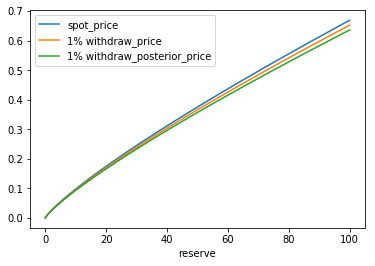

In [11]:
pdf.plot(x="reserve", y = ["spot_price","1% withdraw_price","1% withdraw_posterior_price" ])

In [12]:
pdf['mint_slippage'] = (pdf['1% mint_price']-pdf['spot_price'])/pdf['spot_price']
pdf['withdraw_slippage'] = (pdf['spot_price']-pdf['1% withdraw_price'])/pdf['spot_price']

/anaconda3/lib/python3.6/site-packages/pandas/plotting/_core.py:1716: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  series.name = label


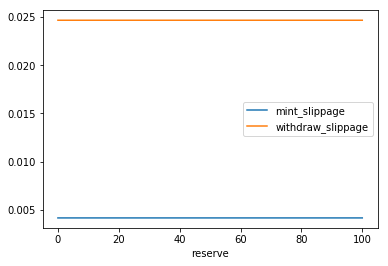

In [13]:
pdf.plot(x='reserve', y = ['mint_slippage', 'withdraw_slippage'])#, logy=True)

In [14]:
#given V0 and kappa
R = 20
S = supply(R,kappa,V0)
p = spot_price(R,kappa,V0)
#sweep the transaction fraction
TXF = np.logspace(-6, 0, num=1000)

#realized price for withdrawing burning .1% of tokens
withdraw_price2=[withdraw(S*txf, R,S, kappa, V0)[1] for txf in TXF]

#realized price for depositing .1% more Xdai into the reserve
mint_price2=[mint(R*txf, R,S, kappa, V0)[1] for txf in TXF]

In [16]:
pdf2 = pd.DataFrame({'tx_fraction':TXF, 'spot_price':p*np.ones(len(TXF)), 'mint_price':mint_price2,'withdraw_price':withdraw_price2 })

/anaconda3/lib/python3.6/site-packages/pandas/plotting/_core.py:1716: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  series.name = label


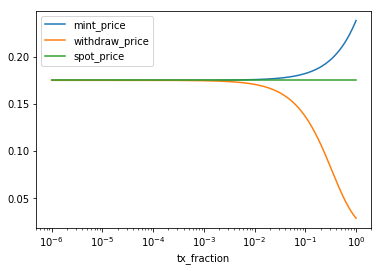

In [17]:
pdf2.plot(x='tx_fraction',y=['mint_price','withdraw_price','spot_price'], logx=True)

In [18]:
pdf2['mint_slippage'] = (pdf2['mint_price']-pdf2['spot_price'])/pdf2['spot_price']
pdf2['withdraw_slippage'] = (pdf2['spot_price']-pdf2['withdraw_price'])/pdf2['spot_price']

/anaconda3/lib/python3.6/site-packages/pandas/plotting/_core.py:1716: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  series.name = label


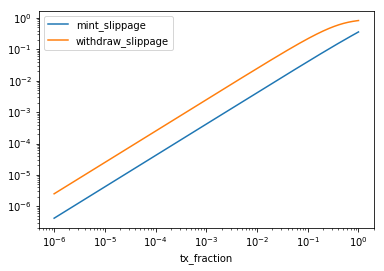

In [19]:
pdf2.plot(x='tx_fraction', y = ['mint_slippage', 'withdraw_slippage'], logx=True, logy=True)

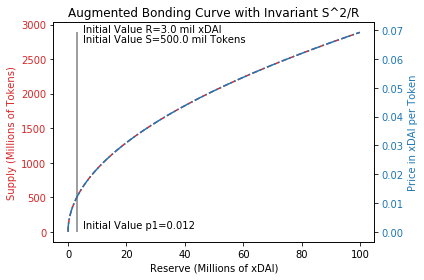

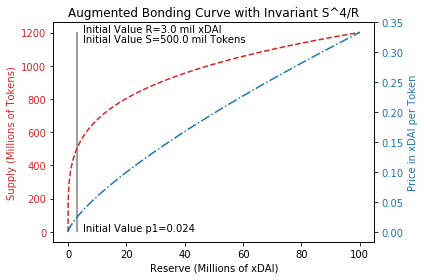

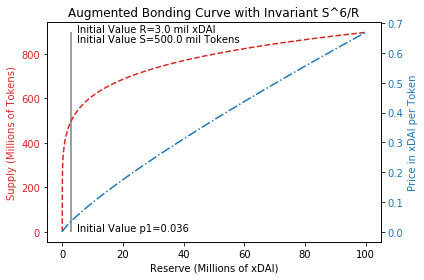

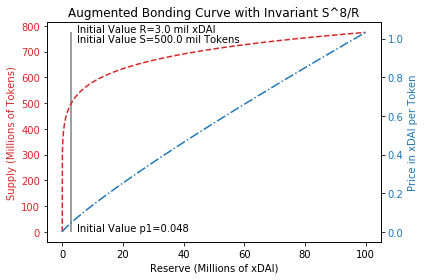

In [20]:
Kappa_List = [2,4,6,8]
for kappa in Kappa_List:
    
    V0 = invariant(R0,S0,kappa)
    
    reserve = np.arange(0,100,.01)
    supp = np.array([supply(r,kappa, V0) for r in reserve])
    price = np.array([spot_price(r,kappa, V0) for r in reserve])

    fig, ax1 = plt.subplots()

    color = 'tab:red'
    ax1.set_xlabel('Reserve (Millions of xDAI)')
    ax1.set_ylabel('Supply (Millions of Tokens)', color=color)
    ax1.plot(reserve, supp,'--', color=color)
    ax1.tick_params(axis='y', labelcolor=color)

    ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

    color = 'tab:blue'
    ax2.set_ylabel('Price in xDAI per Token', color=color)  # we already handled the x-label with ax1
    ax2.plot(reserve, price,'-.', color=color)
    ax2.tick_params(axis='y', labelcolor=color)

    ax1.vlines(R0,0,supp[-1], alpha=.5)
    ax1.text(R0+.02*reserve[-1], supp[-1], "Initial Value R="+str(int(100*R0)/100)+" mil xDAI")
    ax1.text(R0+.02*reserve[-1], .95*supp[-1], "Initial Value S="+str(int(100*S0)/100)+" mil Tokens")
    #ax1.hlines(S0,0,R0)

    ax2.text(R0+.02*reserve[-1], price[3], "Initial Value p1="+str(int(1000*spot_price(R0,kappa,V0))/1000))


    plt.title('Augmented Bonding Curve with Invariant S^'+str(kappa)+'/R')
    fig.tight_layout()  # otherwise the right y-label is slightly clipped
    plt.show()

In [21]:
#Power function independent variables for analysis
vec_d0 = np.arange(2.5,5.1,.1) #millon dai
vec_theta = np.arange(.1,.55,.05) #unitless
mat_R0 = np.outer(vec_d0.T, (1-vec_theta)) #million dai
vec_p0 = np.arange(.01,.11,.01) #dai per token
mat_S0 = np.outer(vec_d0.T, vec_p0) #milion tokens
vec_kappa = np.arange(2,9,1) #integer

mat_return_ratio = np.outer(vec_kappa.T, (1-vec_theta))

Text(0.5,1,'Hatch Return Rate p1/p0')

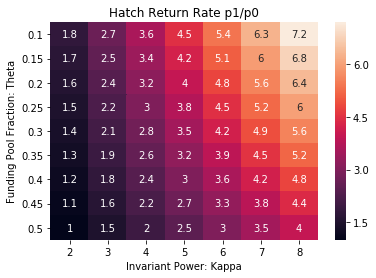

In [22]:
p0_lab = [str(int(100*p)/100) for p in vec_p0] 
th_lab = [str(int(100*th)/100) for th in vec_theta]
k_lab = [str(k) for k in vec_kappa] 
sns.heatmap(mat_return_ratio.T,yticklabels=th_lab, xticklabels=k_lab, annot=True)
plt.yticks(rotation=0)
plt.xlabel('Invariant Power: Kappa')
plt.ylabel('Funding Pool Fraction: Theta')
plt.title('Hatch Return Rate p1/p0')

Text(0.5,1,'Funding Pool Funds at Launch (Millions of xDAI)')

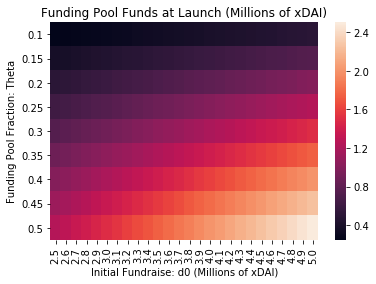

In [23]:
d_lab = [str(int(100*d)/100) for d in vec_d0] 
sns.heatmap(vec_d0-mat_R0.T,yticklabels=th_lab, xticklabels=d_lab)#, annot=True)
plt.yticks(rotation=0)

plt.xlabel('Initial Fundraise: d0 (Millions of xDAI)')
plt.ylabel('Funding Pool Fraction: Theta')
plt.title('Funding Pool Funds at Launch (Millions of xDAI)')

Text(0.5,15,'Intial Raise d0 (Millions of xDAI)')

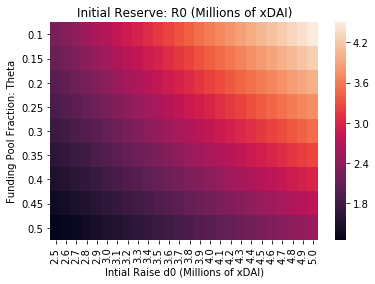

In [24]:
d_lab = [str(int(100*d)/100) for d in vec_d0] 
sns.heatmap(mat_R0.T,yticklabels=th_lab, xticklabels=d_lab)#, annot=True)
plt.yticks(rotation=0)

plt.title('Initial Reserve: R0 (Millions of xDAI)')
plt.ylabel('Funding Pool Fraction: Theta')
plt.xlabel('Intial Raise d0 (Millions of xDAI)')

Text(0.5,15,'Intial Raise d0 (Millions of xDAI)')

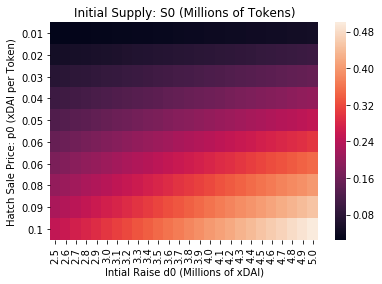

In [25]:
sns.heatmap(mat_S0.T,yticklabels=p0_lab, xticklabels=d_lab)#, annot=True)
plt.yticks(rotation=0)

plt.title('Initial Supply: S0 (Millions of Tokens)')
plt.ylabel('Hatch Sale Price: p0 (xDAI per Token)')
plt.xlabel('Intial Raise d0 (Millions of xDAI)')